<a href="https://colab.research.google.com/github/btknzn/TiagoRobotSkillLearning/blob/main/offlineQLEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
ximport pandas as pd
import os
import torch
import torchvision
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as dset
from torch import nn
#df = pd.read_csv('PlacingBack/data.csv')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pds
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import torchvision.datasets as dset
from torchvision.io import read_image
import cv2
from sklearn.preprocessing import Normalizer
import torchvision.transforms.functional as TF
def read_image_dir(image_folder):
    image_folder  = image_folder
    lst = os.listdir(image_folder) # your directory path
    number_files = len(lst)
    images = []
    for i in range(1,number_files):
        folder = image_folder+"/label"+str(i)+".jpg"
        img = cv2.imread(folder)
        img.resize([img.shape[2],img.shape[0],img.shape[1]])
        images.append(img)
    return images

def read_image_dir_b(image_folder):
    image_folder  = image_folder
    lst = os.listdir(image_folder) # your directory path
    number_files = len(lst)
    images = []
    for i in range(1,number_files):
        folder = image_folder+"/label"+str(i)+".jpg"
        img = cv2.imread(folder,0)
        img.resize(1,img.shape[0],img.shape[1])
        img = img
        images.append(img)
    return images

class MyDataset(Dataset):
 
  def __init__(self,file_name,image_folder_normal,image_folder_depth):
    df=pd.read_csv(file_name)
    self.image_folder_norma = image_folder_normal
    image = read_image_dir(image_folder_normal)
    image = torch.asarray(image).float()
    #correct it for complex situation
    R_means = 188.3424
    R_std = 54.67417
    G_means = 177.37274
    G_std = 66.43382
    B_means = 169.08133
    B_std = 72.04574
    normalized_image = TF.normalize(image,[R_means, G_means, B_means], [R_std, G_std, B_std])
    image = torch.asarray(normalized_image).float()
    imageDs = read_image_dir_b(image_folder_depth)
    D_std =  1.165845
    D_means = 1.2093502
    imageDs = torch.asarray(imageDs).float()
    normalized_disparity = TF.normalize(imageDs,[D_means], [D_std])
    imageDs = torch.asarray(normalized_disparity).float()

    X1_MIN = 0.04995837
    X1_MAX = 0.7562845
    arm_joint1 = (df.arm_joint1-X1_MIN)/(X1_MAX-X1_MIN)
    X2_MIN = -0.43724102
    X2_MAX = 1.0187681
    arm_joint2 = (df.arm_joint2-X2_MIN)/(X2_MAX-X2_MIN)
    X3_MIN = -3.0051005
    X3_MAX = -0.7699633
    arm_joint3 = (df.arm_joint3-X3_MIN)/(X3_MAX-X3_MIN)

    X4_MIN = 0.5167487
    X4_MAX = 2.0607007
    arm_joint4 = (df.arm_joint4-X4_MIN)/(X4_MAX-X4_MIN)
    X5_MIN = -2.0750659
    X5_MAX = 2.0743227
    arm_joint5 = (df.arm_joint5-X5_MIN)/(X5_MAX-X5_MIN)

    X6_MIN = -1.3956555
    X6_MAX = 1.3958309
    arm_joint6 = (df.arm_joint6-X6_MIN)/(X6_MAX-X6_MIN)
    
    X8_MIN = 0.022458013
    X8_MAX = 0.045057185
    gripper_joint1 = (df.gripper_joint1-X8_MIN)/(X8_MAX-X8_MIN)

    X9_MIN = 0.022458013
    X9_MAX = 0.045057185
    gripper_joint2 = (df.gripper_joint2-X9_MIN)/(X9_MAX-X9_MIN)

    X7_MIN = -1.8210393
    X7_MAX = 2.0740623
    arm_joint7= (df.arm_joint7-X7_MIN)/(X7_MAX-X7_MIN)


    X10_MIN = -2.1165963e-06
    X10_MAX = 0.3500109
    torso_joint = (df.torso_joint-X10_MIN)/(X10_MAX-X10_MIN)

    X11_MIN = -0.00033559513
    X11_MAX = 0.0006243193
    torsohead_joint1 = (df.torso_head1-X11_MIN)/(X11_MAX-X11_MIN)

    X12_MIN = -0.7685144
    X12_MAX = 0.0014590342  
    torsohead_joint2 = (df.torso_head2-X12_MIN)/(X12_MAX-X12_MIN)

   

   
   


    

    #1 Feature Number
    self.arm_joint1 = np.round(arm_joint1.values,2)
    #self.arm_joint1 = df.arm_joint1.values
    #2 Feature Number
    self.arm_joint2 = np.round(arm_joint2.values,2)
    #self.arm_joint2 = df.arm_joint2.values
    #3 Feature Number
    self.arm_joint3 = np.round(arm_joint3.values,2)
    #self.arm_joint3 = df.arm_joint3.values
    #4 Feature Number
    self.arm_joint4 = np.round(arm_joint4.values,2)
    #self.arm_joint4 = df.arm_joint4.values
    #5 Feature Number
    self.arm_joint5 = np.round(arm_joint5.values,2)
    #self.arm_joint5 = df.arm_joint5.values
    #6 Feature Number
    self.arm_joint6 = np.round(arm_joint6.values,2)
    #self.arm_joint6 = df.arm_joint6.values
    #7 Feature Number
    self.arm_joint7 = np.round(arm_joint7.values,2)
    #self.arm_joint7 = df.arm_joint7.values
    #8 Feature Number
    self.gripper_joint1 = np.round(gripper_joint1.values,2)
    #self.gripper_joint1 = df.gripper_joint1.values
    #9 Feature Number
    self.gripper_joint2 = np.round(gripper_joint2.values,2)
    #self.gripper_joint2 = df.gripper_joint2.values
    #10 Feature Number
    self.torso_joint = np.round(torso_joint.values,2)
    #self.torso_joint = df.torso_joint.values
    #11 Feature Number
    self.torsohead_joint1 = np.round(torsohead_joint1.values,2)
    #self.torsohead_joint1 = df.torso_head1.values
    #12 Feature Number
    self.torsohead_joint2 = np.round(torsohead_joint2.values,2)
    #self.torsohead_joint2 = df.torso_head2.values
    #self.rewards = np.zeros((0,torsohead_joint1.shape[0]))
    self.reward = np.zeros((1,torsohead_joint1.shape[0]))
    self.reward[0,self.reward.shape[1]-1]=100
    self.reward[0,self.reward.shape[1]-2]=100
    self.reward[0,self.reward.shape[1]-3]=100

    self.image = image
    #self.image = read_image_dir(image_folder_normal)
    #self.image =  torch.asarray(self.image).float()
    self.imageDs = imageDs
    #self.imageDs = read_image_dir_b(image_folder_depth)
    #self.imageDs = torch.asarray(self.imageDs).float()


  def __len__(self):
    return int(min(self.image.shape[0],self.imageDs.shape[0],self.arm_joint6.shape[0],self.torso_joint.shape[0],self.torsohead_joint1.shape[0])-1)
   
  def __getitem__(self,idx):
    currentRobot = [self.arm_joint1[idx],self.arm_joint2[idx],self.arm_joint3[idx],self.arm_joint4[idx],self.arm_joint5[idx],self.arm_joint6[idx],self.arm_joint7[idx],self.gripper_joint1[idx],self.gripper_joint2[idx],self.torso_joint[idx],self.torsohead_joint1[idx],self.torsohead_joint2[idx]]
    if idx >= len(self.arm_joint1)-3:   
      nextActionRobot = [self.arm_joint1[idx],self.arm_joint2[idx],self.arm_joint3[idx],self.arm_joint4[idx],self.arm_joint5[idx],self.arm_joint6[idx],self.arm_joint7[idx],self.gripper_joint1[idx],self.gripper_joint2[idx],self.torso_joint[idx],self.torsohead_joint1[idx],self.torsohead_joint2[idx]]
      nextnextActionRobot = [self.arm_joint1[idx],self.arm_joint2[idx],self.arm_joint3[idx],self.arm_joint4[idx],self.arm_joint5[idx],self.arm_joint6[idx],self.arm_joint7[idx],self.gripper_joint1[idx],self.gripper_joint2[idx],self.torso_joint[idx],self.torsohead_joint1[idx],self.torsohead_joint2[idx]]
      x = torch.Tensor(currentRobot)
      x = x.reshape((1,x.shape[0]))
      image_current = self.image[idx]
      image_next = self.image[idx]
      depth_current = self.imageDs[idx]
      depth_next = self.imageDs[idx]
      y = torch.Tensor(nextActionRobot)
      y = y.reshape((1,y.shape[0]))
      z = torch.Tensor(nextnextActionRobot)
      z = z.reshape((1,z.shape[0]))
      rewardcurrent = self.reward[0,idx]
      rewardnext = self.reward[0,idx]
      return x,y,image_current,image_next,depth_current,depth_next,rewardcurrent,rewardnext,z

    else:
      image_current = self.image[idx] 
      depth_current = self.imageDs[idx]
      reward = self.reward[0,idx]
      idx = idx+1
      nextActionRobot = [self.arm_joint1[idx],self.arm_joint2[idx],self.arm_joint3[idx],self.arm_joint4[idx],self.arm_joint5[idx],self.arm_joint6[idx],self.arm_joint7[idx],self.gripper_joint1[idx],self.gripper_joint2[idx],self.torso_joint[idx],self.torsohead_joint1[idx],self.torsohead_joint2[idx]]
      x = torch.Tensor(currentRobot)
      x = x.reshape((1,x.shape[0]))
      y = torch.Tensor(nextActionRobot)
      y = y.reshape((1,y.shape[0]))
      image_next = self.image[idx]
      depth_next = self.imageDs[idx]
      reward_next = self.reward[0,idx]
      idx = idx+2
      nextnextActionRobot = [self.arm_joint1[idx],self.arm_joint2[idx],self.arm_joint3[idx],self.arm_joint4[idx],self.arm_joint5[idx],self.arm_joint6[idx],self.arm_joint7[idx],self.gripper_joint1[idx],self.gripper_joint2[idx],self.torso_joint[idx],self.torsohead_joint1[idx],self.torsohead_joint2[idx]]
      z = torch.Tensor(nextActionRobot)
      z = z.reshape((1,z.shape[0]))
      return x,y,image_current,image_next,depth_current,depth_next,reward, reward_next,z


    

In [ ]:
class ReverseDataset(torch.utils.data.Dataset):
    def __init__(self, original_dataset):
        self.original_dataset = original_dataset

    def __getitem__(self, index):
        return self.original_dataset[len(self.original_dataset) - index]

    def __len__(self):
        return len(self.original_dataset)

In [ ]:
import pandas as pd
import os
import torch
import torchvision
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as dset
from torch import nn
#df = pd.read_csv('PlacingBack/data.csv')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pds
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader,IterableDataset
import torchvision.datasets as dset
from torchvision.io import read_image
import cv2
from sklearn.preprocessing import Normalizer


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/datasets/

/content/drive/MyDrive/datasets


In [ ]:
# -*- coding: utf-8 -*-
"""resnet18basedAutoencoder.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1TkVvsE39DDP-FzpxqKN2UzbWDu-5Wd57
"""

from matplotlib import pyplot as plt
import numpy as np

import torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
import torchvision.datasets as dset
from torchvision.utils import save_image
import torchvision.utils as vutils
from torchsummary import summary
from IPython import display
import torchvision.models as models
from torchvision import datasets, models, transforms
from matplotlib import pyplot as plt
import numpy as np

from matplotlib import pyplot as plt
import numpy as np

import torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
import torchvision.datasets as dset
from torchvision.utils import save_image
import torchvision.utils as vutils
from torchsummary import summary
from torch.utils.data.sampler import SubsetRandomSampler


nb_channls=3
image_size1 = 96
image_size2 = 128 
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    x = x.view(x.size(0), nb_channls, image_size1, image_size2)
    return x


class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 8, kernel_size=5,stride=2),
            nn.ReLU(),
            nn.BatchNorm2d(8),
            nn.Conv2d(8,16,kernel_size=5,stride=2),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Conv2d(16,32,kernel_size=5,stride=2),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32,16,kernel_size=5,stride=2),
            nn.ReLU(),
            ) 
        
        self.decoder = nn.Sequential(
            nn.BatchNorm2d(16),
            nn.ConvTranspose2d(16,32,kernel_size=5,stride=2),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.ConvTranspose2d(32,16,kernel_size=5,stride=2),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.ConvTranspose2d(16,8,kernel_size=5,stride=2,output_padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(8),
            nn.ConvTranspose2d(8,3,kernel_size=5,stride=2,output_padding=1),
            nn.Sigmoid(),
            nn.BatchNorm2d(3)
            )    
    
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x



In [ ]:
class autoencoderBLACK(nn.Module):
    def __init__(self):
        super(autoencoderBLACK, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=5,stride=2),
            nn.ReLU(),
            nn.BatchNorm2d(8),
            nn.Conv2d(8,16,kernel_size=5,stride=2),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Conv2d(16,32,kernel_size=5,stride=2),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32,16,kernel_size=5,stride=2),
            nn.ReLU(),
            ) 
        
        self.decoder = nn.Sequential(
            nn.BatchNorm2d(16),
            nn.ConvTranspose2d(16,32,kernel_size=5,stride=2),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.ConvTranspose2d(32,16,kernel_size=5,stride=2),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.ConvTranspose2d(16,8,kernel_size=5,stride=2,output_padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(8),
            nn.ConvTranspose2d(8,1,kernel_size=5,stride=2,output_padding=1),
            nn.Sigmoid(),
            nn.BatchNorm2d(1)
            )    
    
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
class LSTMPredictor(nn.Module):
  def __init__(self,n_hidden=1024):
    super(LSTMPredictor,self).__init__()
    self.n_hidden = n_hidden
    self.lstm1 = nn.LSTMCell(504,self.n_hidden)
    self.lstm2 = nn.LSTMCell(self.n_hidden,self.n_hidden)
    self.lstm3 = nn.LSTMCell(self.n_hidden,self.n_hidden)
    self.lstm4 = nn.LSTMCell(self.n_hidden,self.n_hidden)
    self.linear = nn.Linear(self.n_hidden,1)
    self.encoder = autoencoder_COLOR.encoder
    self.encoderB = autoencoderBLACK.encoder

  def forward1(self,x,image_current,depth_current,movement,alfa,rewardcurrent):
    outputs = []
    n_samples = 1
    latent_RGB = self.encoder(image_current)
    latent_D  = self.encoderB(depth_current)
    flattenx = torch.flatten(x,start_dim=1)
    flattenmovement = torch.flatten(movement,start_dim=1)
    latentImage = torch.flatten(latent_RGB,start_dim=1)
    latentDepth = torch.flatten(latent_D,start_dim=1)
    lstm_input = torch.cat((latentImage,latentDepth,flattenx,flattenmovement),1)
    lstm_input = lstm_input[:,None,:]
    h_t = torch.zeros(n_samples,self.n_hidden,dtype=torch.float32).to(device)
    c_t = torch.zeros(n_samples,self.n_hidden,dtype=torch.float32).to(device)
    h_t2 = torch.zeros(n_samples,self.n_hidden,dtype=torch.float32).to(device)
    c_t2 = torch.zeros(n_samples,self.n_hidden,dtype=torch.float32).to(device)
    h_t3 = torch.zeros(n_samples,self.n_hidden,dtype=torch.float32).to(device)
    c_t3 = torch.zeros(n_samples,self.n_hidden,dtype=torch.float32).to(device)
    h_t4 = torch.zeros(n_samples,self.n_hidden,dtype=torch.float32).to(device)
    c_t4 = torch.zeros(n_samples,self.n_hidden,dtype=torch.float32).to(device)
    counter = 0
    discount = alfa
    for input_t in lstm_input.split(1,dim=0):
      h_t , c_t = self.lstm1(input_t[0],(h_t,c_t))
      h_t2 , c_t2 = self.lstm2(h_t,(h_t,c_t))
      h_t3 , c_t3 = self.lstm2(h_t,(h_t2,c_t2))
      h_t4 , c_t4 = self.lstm2(h_t,(h_t3,c_t3))
      output = rewardcurrent[counter]+discount*self.linear(h_t4)
      outputs.append(output)
      counter = counter +1
      discount = discount*alfa
    outputs = torch.cat(outputs,dim=0)
    return outputs

  def forward2(self,x,image_current,depth_current,movement):
    outputs = []
    n_samples = 1
    latent_RGB = self.encoder(image_current)
    latent_D  = self.encoderB(depth_current)
    flattenx = torch.flatten(x,start_dim=1)
    flattenmovement = torch.flatten(movement,start_dim=1)
    latentImage = torch.flatten(latent_RGB,start_dim=1)
    latentDepth = torch.flatten(latent_D,start_dim=1)
    lstm_input = torch.cat((latentImage,latentDepth,flattenx,flattenmovement),1)
    lstm_input = lstm_input[:,None,:]
    h_t = torch.zeros(n_samples,self.n_hidden,dtype=torch.float32).to(device)
    c_t = torch.zeros(n_samples,self.n_hidden,dtype=torch.float32).to(device)
    h_t2 = torch.zeros(n_samples,self.n_hidden,dtype=torch.float32).to(device)
    c_t2 = torch.zeros(n_samples,self.n_hidden,dtype=torch.float32).to(device)
    h_t3 = torch.zeros(n_samples,self.n_hidden,dtype=torch.float32).to(device)
    c_t3 = torch.zeros(n_samples,self.n_hidden,dtype=torch.float32).to(device)
    h_t4 = torch.zeros(n_samples,self.n_hidden,dtype=torch.float32).to(device)
    c_t4 = torch.zeros(n_samples,self.n_hidden,dtype=torch.float32).to(device)
    for input_t in lstm_input.split(1,dim=0):
      h_t , c_t = self.lstm1(input_t[0],(h_t,c_t))
      h_t2 , c_t2 = self.lstm2(h_t,(h_t,c_t))
      h_t3 , c_t3 = self.lstm2(h_t,(h_t2,c_t2))
      h_t4 , c_t4 = self.lstm2(h_t,(h_t3,c_t3))
      output = self.linear(h_t4)
      outputs.append(output)
    outputs = torch.cat(outputs,dim=0)
    return outputs
    
  def forward(self,x,image_current,depth_current,movement):
    outputs = []
    n_samples = 1
    latent_RGB = self.encoder(image_current)
    latent_D  = self.encoderB(depth_current)
    flattenx = torch.flatten(x,start_dim=1)
    flattenmovement = torch.flatten(movement,start_dim=1)
    latentImage = torch.flatten(latent_RGB,start_dim=1)
    latentDepth = torch.flatten(latent_D,start_dim=1)
    lstm_input = torch.cat((latentImage,latentDepth,flattenx,flattenmovement),1)
    lstm_input = lstm_input[:,None,:]
    h_t = torch.zeros(n_samples,self.n_hidden,dtype=torch.float32).to(device)
    c_t = torch.zeros(n_samples,self.n_hidden,dtype=torch.float32).to(device)
    h_t2 = torch.zeros(n_samples,self.n_hidden,dtype=torch.float32).to(device)
    c_t2 = torch.zeros(n_samples,self.n_hidden,dtype=torch.float32).to(device)
    h_t3 = torch.zeros(n_samples,self.n_hidden,dtype=torch.float32).to(device)
    c_t3 = torch.zeros(n_samples,self.n_hidden,dtype=torch.float32).to(device)
    h_t4 = torch.zeros(n_samples,self.n_hidden,dtype=torch.float32).to(device)
    c_t4 = torch.zeros(n_samples,self.n_hidden,dtype=torch.float32).to(device)
    for input_t in lstm_input.split(1,dim=0):
      h_t , c_t = self.lstm1(input_t[0],(h_t,c_t))
      h_t2 , c_t2 = self.lstm2(h_t,(h_t,c_t))
      h_t3 , c_t3 = self.lstm2(h_t,(h_t2,c_t2))
      h_t4 , c_t4 = self.lstm2(h_t,(h_t3,c_t3))
      output = self.linear(h_t4)
      outputs.append(output)
    outputs = torch.cat(outputs,dim=0)
    return outputs
        
    

In [ ]:
autoencoder_COLOR = autoencoder()
autoencoder_COLOR.load_state_dict(torch.load("/content/drive/MyDrive/datasets/AECOLOR.pth"))

autoencoderBLACK = autoencoderBLACK()

autoencoderBLACK.load_state_dict(torch.load("/content/drive/MyDrive/datasets/AEBLACK.pth"))

autoencoder_COLOR.requires_grad_=True
autoencoder.requires_grad_=True

In [ ]:
datasets_partial = []
data_folder = '/content/drive/MyDrive/datasets'
lst = os.listdir(data_folder)
number_files = len(lst)
completeMotionFolder = []
for i in range(0,number_files):
  folderCompleteMotion = str(i+1)
  if  folderCompleteMotion in lst:
    completeMotionFolder.append(data_folder+"/"+folderCompleteMotion)
          
      
datasets = []            
for i in range(0,len(completeMotionFolder)):
  folder = completeMotionFolder[i]
  lst = os.listdir(folder)
  zeroCSV = folder +"/0.csv"
  depthZERO = folder+'/depth/0'
  imageZERO = folder + '/Image/0'
  dataset = [zeroCSV,imageZERO,depthZERO] 
  datasets.append(dataset)

    
train_loaders = []
for i in range(0,len(datasets)):
  CSV = datasets[i][0]
  depth = datasets[i][1]
  image = datasets[i][2]
  dataset = ReverseDataset(MyDataset(CSV,depth,image))
  train_loader = DataLoader(dataset,shuffle=False,batch_size=32)
  train_loaders.append(train_loader) 

<ipython-input-1-be30bed87e99>:53: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  image = torch.asarray(image).float()


In [ ]:
model = LSTMPredictor().to(device)
#model.load_state_dict(torch.load("/content/drive/MyDrive/datasets/ReinforcementLearningModel.pth"))
criterion = nn.MSELoss()
learning_rate = 1e-4
weight_decay = 1e-7

In [ ]:
n_epoch = 300
#model = LSTMPredictor().to(device)
criterion = nn.MSELoss()
learning_rate = 1e-4
weight_decay = 1e-7
alfa = 0.99
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
for epoch in range(0,n_epoch):
  currentLoss = []
  for j in range(0,len(train_loaders)):
    train_loader = train_loaders[j]
    for data in (train_loader):
      x = data[0][:,:,:].to(device)
      x_next = data[1][:,:,:].to(device)
      image_current = data[2].to(device)
      image_next = data[3].to(device)
      depth_current = data[4].to(device)
      depth_next = data[5].to(device)
      reward = data[6].to(device)
      x_next_next = data[8][:,:,:].to(device)
      movement = (x_next-x_next_next)
      Yi = model.forward1(x.float(),image_current.float(),depth_current.float(),movement.float(),alfa,reward).float()
      predicted = model.forward2(x.float(),image_current.float(),depth_current.float(),movement.float())
      loss = criterion(predicted[:-1],Yi[1:])
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      currentLoss.append(loss)
  print(str(epoch)+".epochnumber", sum(currentLoss)/len(currentLoss))
  if epoch %100:
    torch.save(model.state_dict(), './ReinforcementLearningModel.pth')

0.epochnumber tensor(51.9872, device='cuda:0', grad_fn=<DivBackward0>)
1.epochnumber tensor(47.0858, device='cuda:0', grad_fn=<DivBackward0>)
2.epochnumber tensor(40.3154, device='cuda:0', grad_fn=<DivBackward0>)
3.epochnumber tensor(34.7144, device='cuda:0', grad_fn=<DivBackward0>)
4.epochnumber tensor(28.8972, device='cuda:0', grad_fn=<DivBackward0>)
5.epochnumber tensor(28.6092, device='cuda:0', grad_fn=<DivBackward0>)
6.epochnumber tensor(24.2774, device='cuda:0', grad_fn=<DivBackward0>)
7.epochnumber tensor(25.2076, device='cuda:0', grad_fn=<DivBackward0>)
8.epochnumber tensor(23.9170, device='cuda:0', grad_fn=<DivBackward0>)
9.epochnumber tensor(17.6247, device='cuda:0', grad_fn=<DivBackward0>)
10.epochnumber tensor(24.7201, device='cuda:0', grad_fn=<DivBackward0>)
11.epochnumber tensor(28.1225, device='cuda:0', grad_fn=<DivBackward0>)
12.epochnumber tensor(19.3913, device='cuda:0', grad_fn=<DivBackward0>)
13.epochnumber tensor(14.4378, device='cuda:0', grad_fn=<DivBackward0>)
14

In [ ]:
n_epoch = 300
#model = LSTMPredictor().to(device)
criterion = nn.MSELoss()
learning_rate = 1e-5
weight_decay = 1e-8
alfa = 0.99
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
for epoch in range(0,n_epoch):
  currentLoss = []
  for j in range(0,len(train_loaders)):
    train_loader = train_loaders[j]
    for data in (train_loader):
      x = data[0][:,:,:].to(device)
      x_next = data[1][:,:,:].to(device)
      image_current = data[2].to(device)
      image_next = data[3].to(device)
      depth_current = data[4].to(device)
      depth_next = data[5].to(device)
      reward = data[6].to(device)
      x_next_next = data[8][:,:,:].to(device)
      movement = (x_next-x_next_next)
      Yi = model.forward1(x.float(),image_current.float(),depth_current.float(),movement.float(),alfa,reward).float()
      predicted = model.forward2(x.float(),image_current.float(),depth_current.float(),movement.float())
      loss = criterion(predicted[:-1],Yi[1:])
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      currentLoss.append(loss)
  print(str(epoch)+".epochnumber", sum(currentLoss)/len(currentLoss))
  if epoch %100:
    torch.save(model.state_dict(), './ReinforcementLearningModel.pth')

0.epochnumber tensor(0.1188, device='cuda:0', grad_fn=<DivBackward0>)
1.epochnumber tensor(0.1019, device='cuda:0', grad_fn=<DivBackward0>)
2.epochnumber tensor(0.0881, device='cuda:0', grad_fn=<DivBackward0>)
3.epochnumber tensor(0.0750, device='cuda:0', grad_fn=<DivBackward0>)
4.epochnumber tensor(0.0635, device='cuda:0', grad_fn=<DivBackward0>)
5.epochnumber tensor(0.0530, device='cuda:0', grad_fn=<DivBackward0>)
6.epochnumber tensor(0.0438, device='cuda:0', grad_fn=<DivBackward0>)
7.epochnumber tensor(0.0357, device='cuda:0', grad_fn=<DivBackward0>)
8.epochnumber tensor(0.0288, device='cuda:0', grad_fn=<DivBackward0>)
9.epochnumber tensor(0.0231, device='cuda:0', grad_fn=<DivBackward0>)
10.epochnumber tensor(0.0183, device='cuda:0', grad_fn=<DivBackward0>)
11.epochnumber tensor(0.0145, device='cuda:0', grad_fn=<DivBackward0>)
12.epochnumber tensor(0.0115, device='cuda:0', grad_fn=<DivBackward0>)
13.epochnumber tensor(0.0094, device='cuda:0', grad_fn=<DivBackward0>)
14.epochnumber t

In [ ]:
n_epoch = 300
#model = LSTMPredictor().to(device)
criterion = nn.MSELoss()
learning_rate = 1e-6
weight_decay = 1e-9
alfa = 0.99
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
for epoch in range(0,n_epoch):
  currentLoss = []
  for j in range(0,len(train_loaders)):
    train_loader = train_loaders[j]
    for data in (train_loader):
      x = data[0][:,:,:].to(device)
      x_next = data[1][:,:,:].to(device)
      image_current = data[2].to(device)
      image_next = data[3].to(device)
      depth_current = data[4].to(device)
      depth_next = data[5].to(device)
      reward = data[6].to(device)
      x_next_next = data[8][:,:,:].to(device)
      movement = (x_next-x_next_next)
      Yi = model.forward1(x.float(),image_current.float(),depth_current.float(),movement.float(),alfa,reward).float()
      predicted = model.forward2(x.float(),image_current.float(),depth_current.float(),movement.float())
      loss = criterion(predicted[:-1],Yi[1:])
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      currentLoss.append(loss)
  print(str(epoch)+".epochnumber", sum(currentLoss)/len(currentLoss))
  if epoch %100:
    torch.save(model.state_dict(), './ReinforcementLearningModel.pth')

0.epochnumber tensor(0.0001, device='cuda:0', grad_fn=<DivBackward0>)
1.epochnumber tensor(8.3056e-05, device='cuda:0', grad_fn=<DivBackward0>)
2.epochnumber tensor(6.0790e-05, device='cuda:0', grad_fn=<DivBackward0>)
3.epochnumber tensor(4.8188e-05, device='cuda:0', grad_fn=<DivBackward0>)
4.epochnumber tensor(4.0509e-05, device='cuda:0', grad_fn=<DivBackward0>)
5.epochnumber tensor(3.5251e-05, device='cuda:0', grad_fn=<DivBackward0>)
6.epochnumber tensor(3.1243e-05, device='cuda:0', grad_fn=<DivBackward0>)
7.epochnumber tensor(2.7971e-05, device='cuda:0', grad_fn=<DivBackward0>)
8.epochnumber tensor(2.5208e-05, device='cuda:0', grad_fn=<DivBackward0>)
9.epochnumber tensor(2.2825e-05, device='cuda:0', grad_fn=<DivBackward0>)
10.epochnumber tensor(2.0748e-05, device='cuda:0', grad_fn=<DivBackward0>)
11.epochnumber tensor(1.8927e-05, device='cuda:0', grad_fn=<DivBackward0>)
12.epochnumber tensor(1.7319e-05, device='cuda:0', grad_fn=<DivBackward0>)
13.epochnumber tensor(1.5894e-05, devic

In [ ]:
n_epoch = 300
#model = LSTMPredictor().to(device)
criterion = nn.MSELoss()
learning_rate = 1e-7
weight_decay = 1e-9
alfa = 0.99
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
for epoch in range(0,n_epoch):
  currentLoss = []
  for j in range(0,len(train_loaders)):
    train_loader = train_loaders[j]
    for data in (train_loader):
      x = data[0][:,:,:].to(device)
      x_next = data[1][:,:,:].to(device)
      image_current = data[2].to(device)
      image_next = data[3].to(device)
      depth_current = data[4].to(device)
      depth_next = data[5].to(device)
      reward = data[6].to(device)
      x_next_next = data[8][:,:,:].to(device)
      movement = (x_next-x_next_next)
      Yi = model.forward1(x.float(),image_current.float(),depth_current.float(),movement.float(),alfa,reward).float()
      predicted = model.forward2(x.float(),image_current.float(),depth_current.float(),movement.float())
      loss = criterion(predicted[:-1],Yi[1:])
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      currentLoss.append(loss)
  print(str(epoch)+".epochnumber", sum(currentLoss)/len(currentLoss))
  if epoch %100:
    torch.save(model.state_dict(), './ReinforcementLearningModel.pth')

0.epochnumber tensor(1.7474e-06, device='cuda:0', grad_fn=<DivBackward0>)
1.epochnumber tensor(1.1797e-06, device='cuda:0', grad_fn=<DivBackward0>)
2.epochnumber tensor(1.0155e-06, device='cuda:0', grad_fn=<DivBackward0>)
3.epochnumber tensor(8.9339e-07, device='cuda:0', grad_fn=<DivBackward0>)
4.epochnumber tensor(7.9320e-07, device='cuda:0', grad_fn=<DivBackward0>)
5.epochnumber tensor(7.1371e-07, device='cuda:0', grad_fn=<DivBackward0>)
6.epochnumber tensor(6.5065e-07, device='cuda:0', grad_fn=<DivBackward0>)
7.epochnumber tensor(6.0057e-07, device='cuda:0', grad_fn=<DivBackward0>)
8.epochnumber tensor(5.5978e-07, device='cuda:0', grad_fn=<DivBackward0>)
9.epochnumber tensor(5.2554e-07, device='cuda:0', grad_fn=<DivBackward0>)
10.epochnumber tensor(4.9610e-07, device='cuda:0', grad_fn=<DivBackward0>)
11.epochnumber tensor(4.7066e-07, device='cuda:0', grad_fn=<DivBackward0>)
12.epochnumber tensor(4.4816e-07, device='cuda:0', grad_fn=<DivBackward0>)
13.epochnumber tensor(4.2780e-07, d

In [ ]:
n_epoch = 1000
#model = LSTMPredictor().to(device)
criterion = nn.MSELoss()
learning_rate = 1e-9
weight_decay = 1e-12
alfa = 0.99
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
for epoch in range(0,n_epoch):
  currentLoss = []
  for j in range(0,len(train_loaders)):
    train_loader = train_loaders[j]
    for data in (train_loader):
      x = data[0][:,:,:].to(device)
      x_next = data[1][:,:,:].to(device)
      image_current = data[2].to(device)
      image_next = data[3].to(device)
      depth_current = data[4].to(device)
      depth_next = data[5].to(device)
      reward = data[6].to(device)
      x_next_next = data[8][:,:,:].to(device)
      movement = (x_next-x_next_next)
      Yi = model.forward1(x.float(),image_current.float(),depth_current.float(),movement.float(),alfa,reward).float()
      predicted = model.forward2(x.float(),image_current.float(),depth_current.float(),movement.float())
      loss = criterion(predicted[:-1],Yi[1:])
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      currentLoss.append(loss)
  print(str(epoch)+".epochnumber", sum(currentLoss)/len(currentLoss))
  if epoch %100:
    torch.save(model.state_dict(), './ReinforcementLearningModel.pth')

0.epochnumber tensor(1.6662e-07, device='cuda:0', grad_fn=<DivBackward0>)
1.epochnumber tensor(1.6489e-07, device='cuda:0', grad_fn=<DivBackward0>)
2.epochnumber tensor(1.6349e-07, device='cuda:0', grad_fn=<DivBackward0>)
3.epochnumber tensor(1.6236e-07, device='cuda:0', grad_fn=<DivBackward0>)
4.epochnumber tensor(1.6144e-07, device='cuda:0', grad_fn=<DivBackward0>)
5.epochnumber tensor(1.6071e-07, device='cuda:0', grad_fn=<DivBackward0>)
6.epochnumber tensor(1.6012e-07, device='cuda:0', grad_fn=<DivBackward0>)
7.epochnumber tensor(1.5961e-07, device='cuda:0', grad_fn=<DivBackward0>)
8.epochnumber tensor(1.5926e-07, device='cuda:0', grad_fn=<DivBackward0>)
9.epochnumber tensor(1.5889e-07, device='cuda:0', grad_fn=<DivBackward0>)
10.epochnumber tensor(1.5864e-07, device='cuda:0', grad_fn=<DivBackward0>)
11.epochnumber tensor(1.5840e-07, device='cuda:0', grad_fn=<DivBackward0>)
12.epochnumber tensor(1.5822e-07, device='cuda:0', grad_fn=<DivBackward0>)
13.epochnumber tensor(1.5806e-07, d

In [ ]:
def findBestAction(model,train_input,image_current,depth_current):
    action_array = torch.zeros((1,1,12)).to(device)
    bestaction_array = torch.zeros((1,1,12)).to(device)
    for j in range(0,12):
        bestactionReward = None
        for action in [-0.05,0,+0.05]:
            action_array[0,0,j] = action
            if bestactionReward == None:
                bestactionReward = model.forward(train_input.float(),image_current.float(),depth_current.float(),action_array.float())
                bestaction_array[0,0,j] = action 
            else:
                reward = model(train_input.float(),image_current.float(),depth_current.float(),action_array.float())
                if reward > bestactionReward:
                    bestaction_array[0,0,j] = action
                    bestactionReward = reward
    return bestaction_array

In [ ]:
x1 = []
x1_pred = []
x2 = []
x2_pred = []
x3 = []
x3_pred = []
x4 = []
x4_pred = []
x5 = []
x5_pred = []
x6 = []
x6_pred = []
x7 = []
x7_pred = []
x8 = []
x8_pred = []
x9= []
x9_pred = []
x10 = []
x10_pred = []
x11 = []
x11_pred = []
x12 = []
x12_pred = []


train_loaders = []
for i in range(0,len(datasets)):
  CSV = datasets[i][0]
  depth = datasets[i][1]
  image = datasets[i][2]
  dataset = MyDataset(CSV,depth,image)
  train_loader = DataLoader(dataset,shuffle=False,batch_size=1)
  train_loaders.append(train_loader) 

In [ ]:
for j in range(0,len(train_loaders)*0+1):
  train_loader = train_loaders[10]
  for data in (train_loader):
    x = data[0][:,:,:].to(device)
    x_next = data[1][:,:,:].to(device)
    image_current = data[2].to(device)
    image_next = data[3].to(device)
    depth_current = data[4].to(device)
    depth_next = data[5].to(device)
    train_input = x
    train_target = x_next
    action = findBestAction(model,train_input,image_current,depth_current)
    out = x +action.to(device)
    x1.append(torch.flatten(x[:,:,0]).tolist())
    x2.append(torch.flatten(x[:,:,1]).tolist())
    x3.append(torch.flatten(x[:,:,2]).tolist())
    x4.append(torch.flatten(x[:,:,3]).tolist())
    x5.append(torch.flatten(x[:,:,4]).tolist())
    x6.append(torch.flatten(x[:,:,5]).tolist())
    x7.append(torch.flatten(x[:,:,6]).tolist())
    x8.append(torch.flatten(x[:,:,7]).tolist())
    x9.append(torch.flatten(x[:,:,8]).tolist())
    x10.append(torch.flatten(x[:,:,9]).tolist())
    x11.append(torch.flatten(x[:,:,10]).tolist())
    x12.append(torch.flatten(x[:,:,11]).tolist())
    x1_pred.append(out[:,0,0].tolist())
    x2_pred.append(out[:,0,1].tolist())
    x3_pred.append(out[:,0,2].tolist())
    x4_pred.append(out[:,0,3].tolist())
    x5_pred.append(out[:,0,4].tolist())
    x6_pred.append(out[:,0,5].tolist())
    x7_pred.append(out[:,0,6].tolist())
    x8_pred.append(out[:,0,7].tolist())
    x9_pred.append(out[:,0,8].tolist())
    x10_pred.append(out[:,0,9].tolist())
    x11_pred.append(out[:,0,10].tolist())
    x12_pred.append(out[:,0,11].tolist())

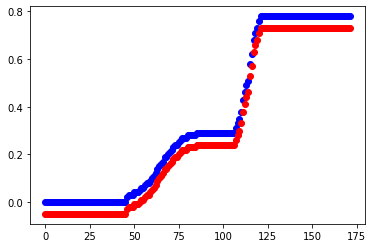

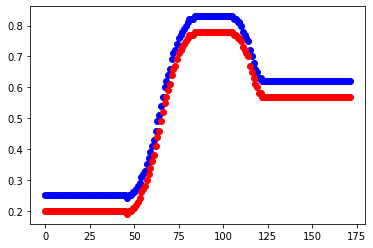

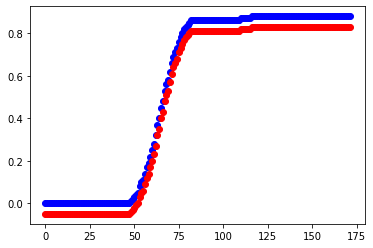

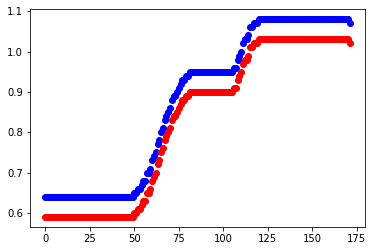

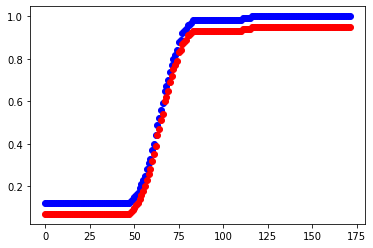

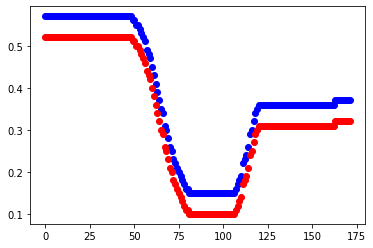

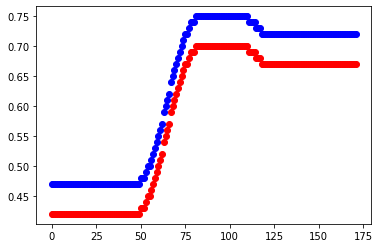

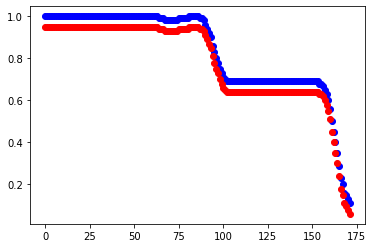

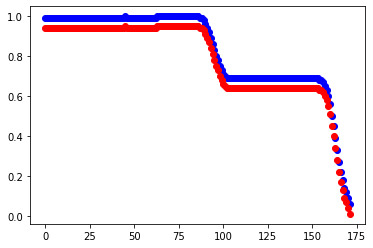

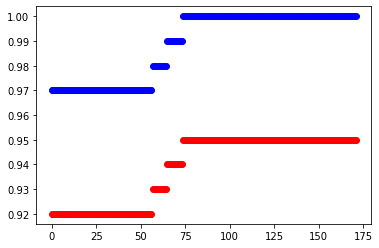

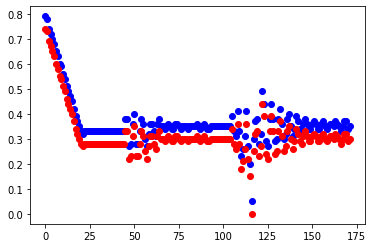

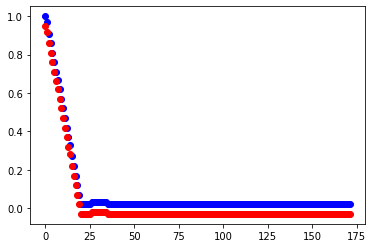

In [ ]:

x1 = np.array(x1)
x2 = np.array(x2)
x3 = np.array(x3)
x4 = np.array(x4)
x5 = np.array(x5)
x6 = np.array(x6)
x7 = np.array(x7)
x8 = np.array(x8)
x9 = np.array(x9)
x10 = np.array(x10)
x11 = np.array(x11)
x12 = np.array(x12)

x1_pred = np.array(x1_pred)
x2_pred = np.array(x2_pred)
x3_pred = np.array(x3_pred)
x4_pred = np.array(x4_pred)
x5_pred = np.array(x5_pred)
x6_pred = np.array(x6_pred)
x7_pred = np.array(x7_pred)
x8_pred = np.array(x8_pred)
x9_pred = np.array(x9_pred)
x10_pred = np.array(x10_pred)
x11_pred = np.array(x11_pred)
x12_pred = np.array(x12_pred)


t1 = np.arange(0.0, x1_pred.shape[0], 1) 
plt.figure()
plt.plot(t1, x1, 'bo')
plt.plot( t1, x1_pred, 'or')
plt.savefig('outputs/x1axis_offlineRL.png')

t2 = np.arange(0.0, x2_pred.shape[0], 1) 
plt.figure()
plt.plot(t2, x2, 'bo')   
plt.plot( t2, x2_pred, 'or')
plt.savefig('outputs/x2axis_offlineRL.png')

t3 = np.arange(0.0, x3_pred.shape[0], 1) 
plt.figure()
plt.plot(t3, x3, 'bo')
plt.plot( t3, x3_pred, 'or')
plt.savefig('outputs/x1axis_offlineRL.png')


t4 = np.arange(0.0, x4_pred.shape[0], 1) 
plt.figure()
plt.plot(t4, x4, 'bo')
plt.plot( t4, x4_pred, 'or')
plt.savefig('outputs/x4axis_offlineRL.png')

t5 = np.arange(0.0, x5_pred.shape[0], 1) 
plt.figure()
plt.plot(t5, x5, 'bo')
plt.plot( t5, x5_pred, 'or')
plt.savefig('outputs/x5axis_offlineRL.png')

t6 = np.arange(0.0, x6_pred.shape[0], 1) 
plt.figure()
plt.plot(t6, x6, 'bo')
plt.plot( t6, x6_pred, 'or')
plt.savefig('outputs/x6axis_offlineRL.png')

t7 = np.arange(0.0, x7_pred.shape[0], 1) 
plt.figure()
plt.plot(t7, x7, 'bo')
plt.plot( t7, x7_pred, 'or')
plt.savefig('outputs/x7axis_offlineRL.png')   

t8 = np.arange(0.0, x8_pred.shape[0], 1) 
plt.figure()
plt.plot(t8, x8, 'bo')
plt.plot( t8, x8_pred, 'or')
plt.savefig('outputs/x8axis_offlineRL.png') 

t9 = np.arange(0.0, x9_pred.shape[0], 1) 
plt.figure()
plt.plot(t9, x9, 'bo')
plt.plot( t9, x9_pred, 'or')
plt.savefig('outputs/x9axis_offlineRL.png') 


t10 = np.arange(0.0, x10_pred.shape[0], 1) 
plt.figure()
plt.plot(t10, x10, 'bo')
plt.plot( t10, x10_pred, 'or')
plt.savefig('outputs/x10axis_offlineRL.png') 

t11 = np.arange(0.0, x11_pred.shape[0], 1) 
plt.figure()
plt.plot(t11, x11, 'bo')
plt.plot( t11, x11_pred, 'or')
plt.savefig('outputs/x11axis_offlineRL.png') 

t12 = np.arange(0.0, x12_pred.shape[0], 1) 
plt.figure()
plt.plot(t12, x12, 'bo')
plt.plot( t12, x12_pred, 'or')
plt.savefig('outputs/x12axis_offlineRL.png')